# Intro

... In 1984, the number of members in the U.S. House of Representatives was 435. Each member has voted on 17 proposals, and the possible responses were 3: Yes, no, and present. 

Through this voting, I will try to predict with decent quality using a Support Vector Machine (SVM) model.


![](https://thehill.com/wp-content/uploads/sites/2/2022/11/HouseChamber_022822_AP_J-Scott-Applewhite.jpg)

# Imports

In [59]:
import os
for dirname, _, filenames in os.walk('C:/Users/solmaz/Desktop/Allfiles/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

C:/Users/solmaz/Desktop/Allfiles/datasets\house-votes-84.csv
C:/Users/solmaz/Desktop/Allfiles/datasets\house-votes-84.names


# Exploration data

Firstly, we import the dataset into a Panda's dataframe

In [60]:
df = pd.read_csv('C:/Users/solmaz/Desktop/Allfiles/datasets\house-votes-84.csv')

In order to explore the dataset, there are a few steps that you must check first:

In [61]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [62]:
df.tail()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


Now, let's examine the dimensions of the dataset:

In [63]:
df.shape

(435, 17)

This dataset contains 17 columns by 435 rows. Now lets see inside the 'df' itself

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

As we can see, there are no missing values. There are no numeric values. There are 16 variables and one target variable. All variables are categorical. **The columns start with a space; this is unusual**, but we will correct it later.

Now, we will obtain the main statistical indicators of the variables in the dataset:

In [65]:
df.describe()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


We can confirm that the target class has only two unique values. As for the rest of the variables, three unique values are observed. Let's analyze these values:

In [66]:
df.rename(columns={'Class Name': 'Class'}, inplace=True)

In [67]:
df['Class'].unique()

array(['republican', 'democrat'], dtype=object)

We can observe that the target variable is set to ['republican', 'democrat'].

Now let's examine the possible values of the remaining variables. To do this, we'll use a function:

In [68]:
df[df.columns.difference(['Class'])].stack().unique()

array(['n', 'y', '?'], dtype=object)

As we can see, the unique values for the entire dataset, excluding the target variable, are ['y', 'n', '?'].

# Adjustment of values



As mentioned earlier, there is a space in front of each column name; let's fix that:

In [69]:
df.columns = df.columns.str.strip()

To better represent the data graphically (well, just to see nice graphs), we will make some adjustments to the content. This will help us understand the responses and graphs more clearly. 

Here, since the third response is '?' ('present') and it can be due to various reasons, we will simplify it as 'other':

In [70]:
df.replace('?', 'other', inplace=True)
df.replace('y', 'yes', inplace=True)
df.replace('n', 'no', inplace=True)

Now, we will analize the amount of instances for each class of the target variable:

In [71]:
df['Class'].value_counts()

Class
democrat      267
republican    168
Name: count, dtype: int64

We can observe that the dataset has an acceptable class balance in its target variable, with further clarification on the Democrat class.

# Data cleaning

Although the above methods have shown us that there are no missing or null values, it is good practice to always perform these checks:

In [72]:
df.isnull().sum().sort_values(ascending=False)

Class                                     0
mx-missile                                0
duty-free-exports                         0
crime                                     0
superfund-right-to-sue                    0
education-spending                        0
synfuels-corporation-cutback              0
immigration                               0
aid-to-nicaraguan-contras                 0
handicapped-infants                       0
anti-satellite-test-ban                   0
religious-groups-in-schools               0
el-salvador-aid                           0
physician-fee-freeze                      0
adoption-of-the-budget-resolution         0
water-project-cost-sharing                0
export-administration-act-south-africa    0
dtype: int64

As we observed earlier, there are no null values in the dataset.

In [73]:
allowed_values = ['democrat', 'republican', 'yes', 'no', 'other']

def check_values(dataframe):
    for column in dataframe.columns:
        if not dataframe[column].isin(allowed_values).all():
            return False
    return True

data_is_clean = check_values(df)
data_is_clean

True

Again, we have confirmed that the expected values are present in the dataset.

# Handling missing values

As we saw in the introduction, votes can be: ['yes', 'no', '?']. Depending on the business rule, we could either eliminate them or treat them as another category.

In this case, instead of treating '?' as missing data, we will consider it as a third category. This is because we believe it represents a present vote to avoid conflicts of interest or an abstention, so we do not consider it as missing data.

# Looking for duplicates

In [74]:
duplicates = df.duplicated()
has_duplicates = duplicates.any()

print(f"Are there any duplicate rows in the dataset? {'Yes' if has_duplicates else 'No'}")

Are there any duplicate rows in the dataset? Yes


**But**, in the absence of a unique identifier for the voter, we cannot eliminate duplicates, as we cannot assert that a duplicate corresponds to the same voter.

# Univariate analysis

To do this, we will define a function that generates two graphs representing the distribution of data in each column:

In [75]:
def plot_univariate_analysis(column):
    var = column
    values = var.value_counts().sort_index().values
    labels = var.value_counts().sort_index().index.astype(str)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
    fig.suptitle(f'Univariate analysis of {var.name}\n')

    ax1.bar(labels, values, color=['#41729F', '#f47927', '#6ac47e'])
    ax1.set_ylabel('Quantity')
    for i, v in enumerate(values):
        ax1.text(i, v + 0.2, str(v), ha='center')

    ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#41729F', '#f47927', '#6ac47e'])
    ax2.axis('equal')
    plt.show()

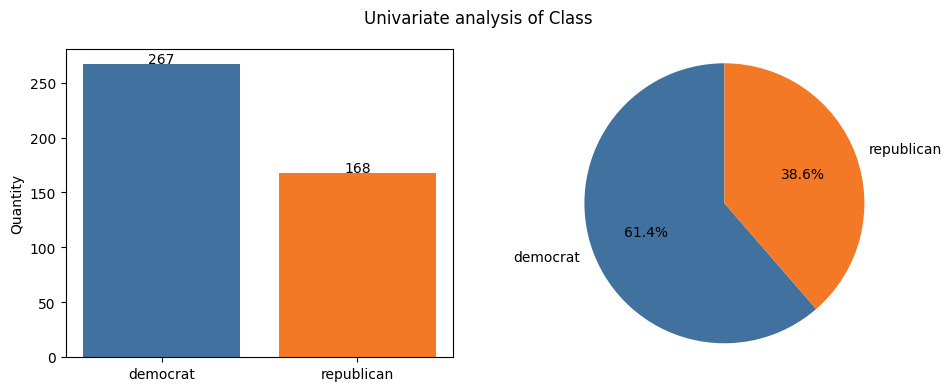

In [76]:
plot_univariate_analysis(df['Class'])

As noted above, the distribution of classes is acceptable in terms of balance. From here we will analyse the remaining columns:

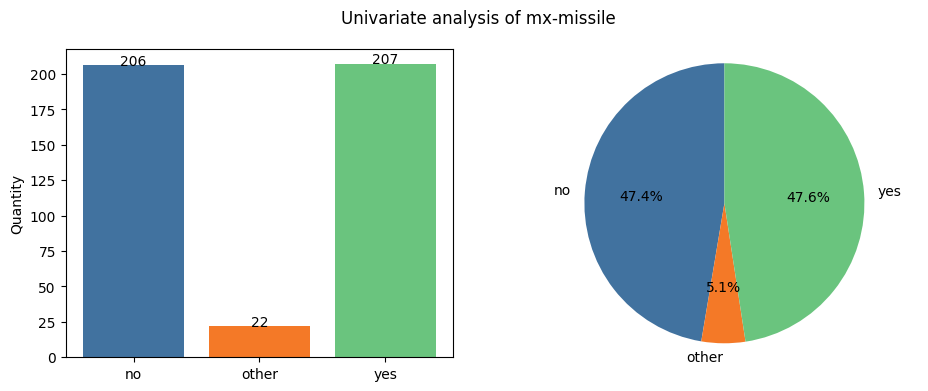

In [77]:
plot_univariate_analysis(df['mx-missile'])

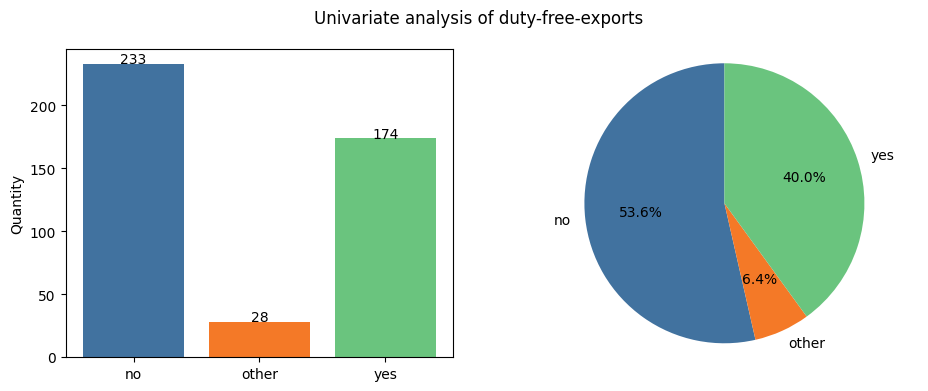

In [78]:
plot_univariate_analysis(df['duty-free-exports'])

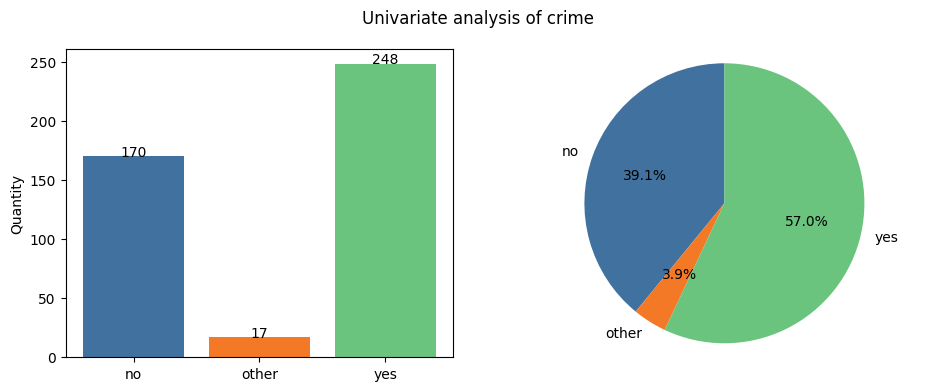

In [79]:
plot_univariate_analysis(df['crime'])

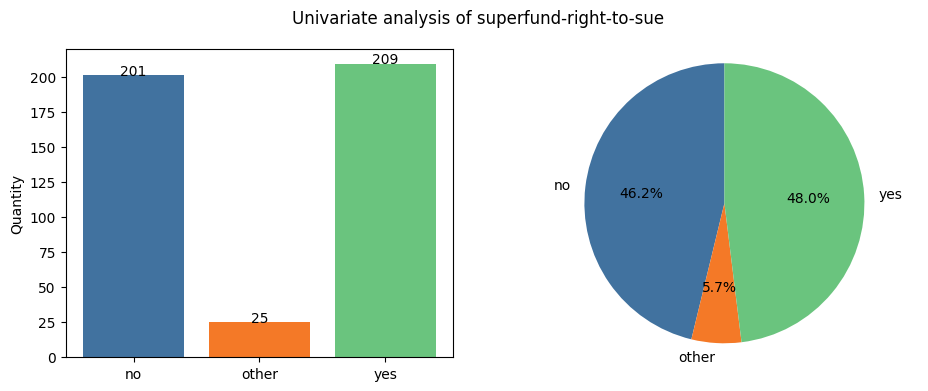

In [80]:
plot_univariate_analysis(df['superfund-right-to-sue'])

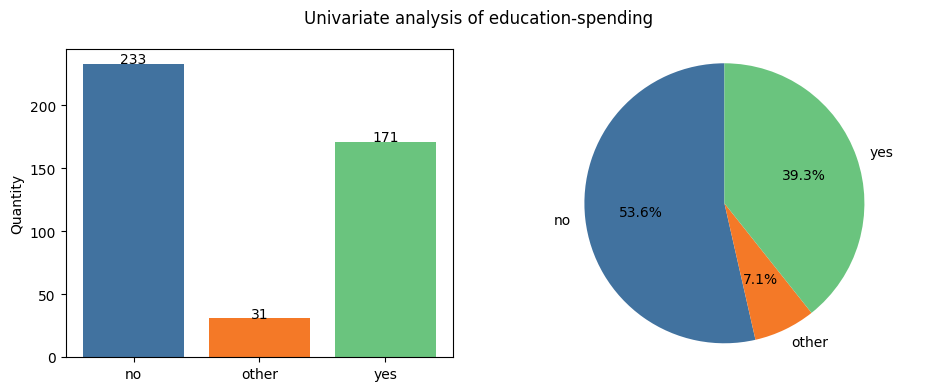

In [81]:
plot_univariate_analysis(df['education-spending'])

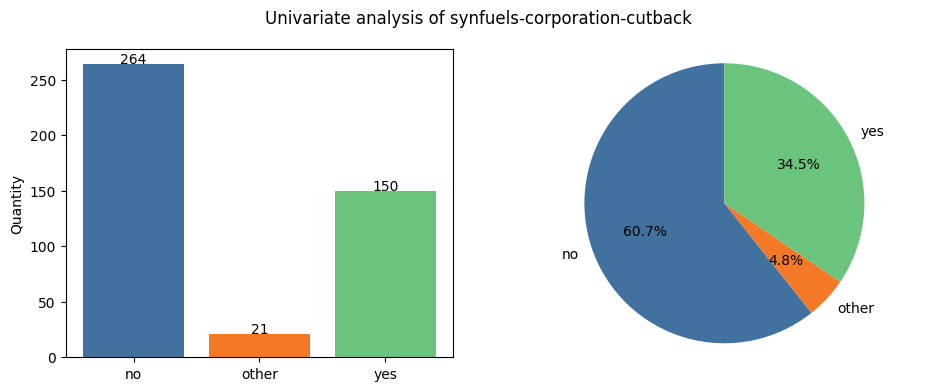

In [82]:
plot_univariate_analysis(df['synfuels-corporation-cutback'])

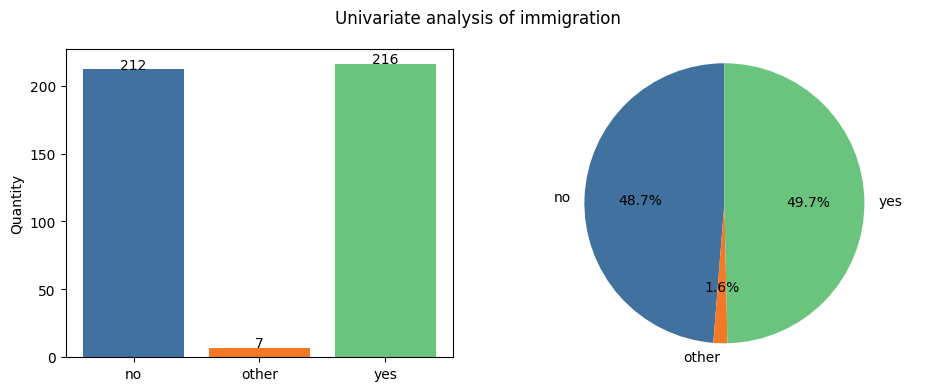

In [83]:
plot_univariate_analysis(df['immigration'])

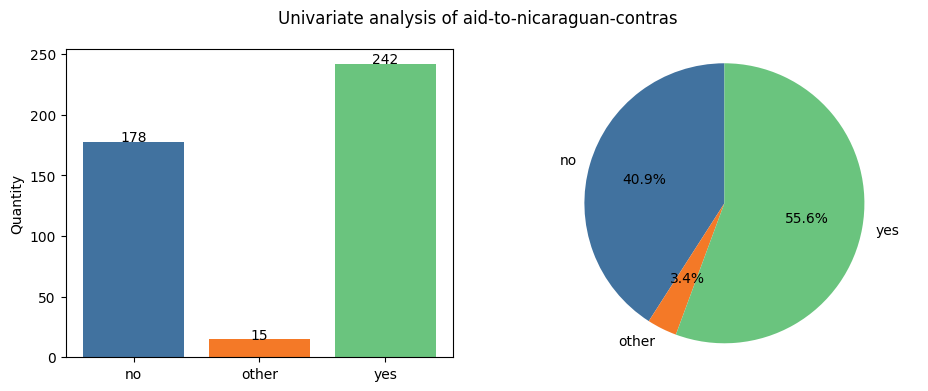

In [84]:
plot_univariate_analysis(df['aid-to-nicaraguan-contras'])

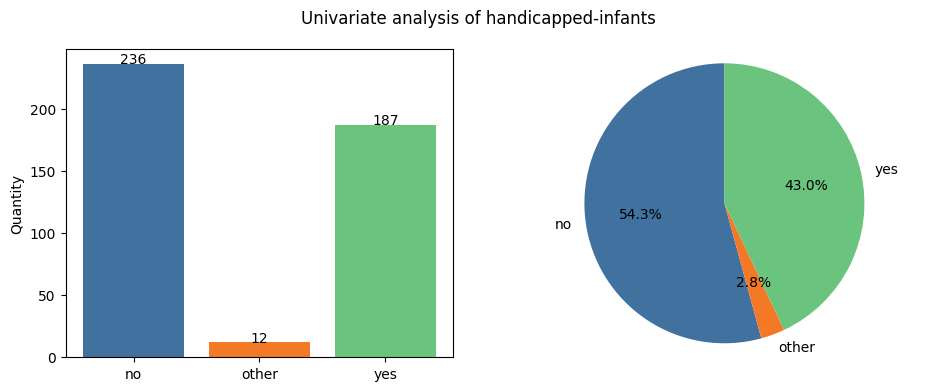

In [85]:
plot_univariate_analysis(df['handicapped-infants'])

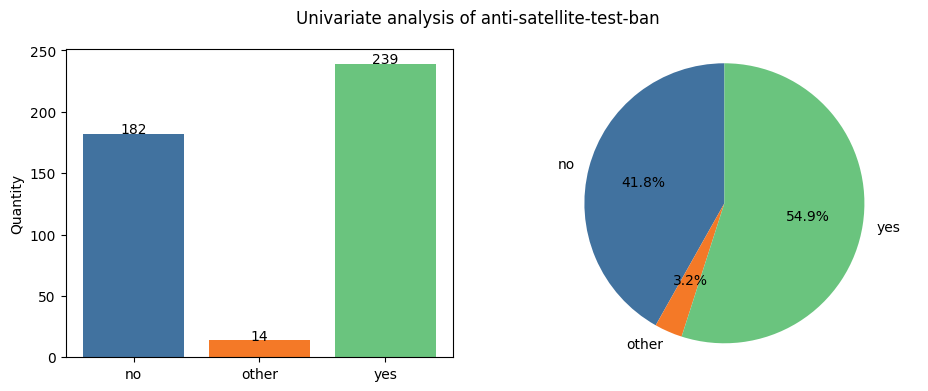

In [86]:
plot_univariate_analysis(df['anti-satellite-test-ban'])

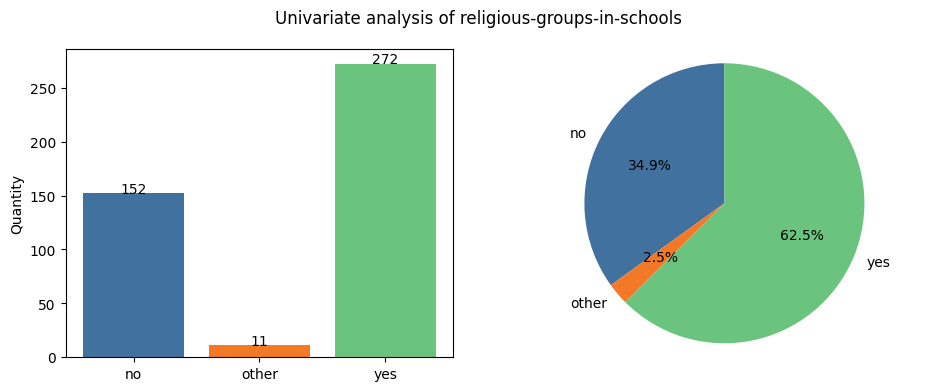

In [87]:
plot_univariate_analysis(df['religious-groups-in-schools'])

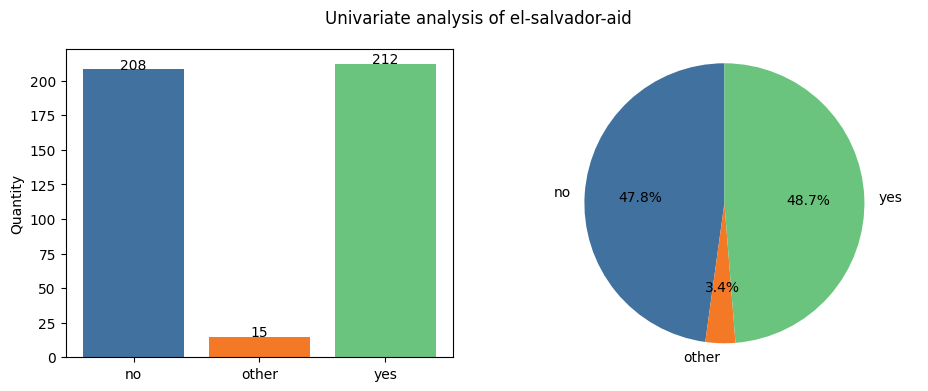

In [88]:
plot_univariate_analysis(df['el-salvador-aid'])

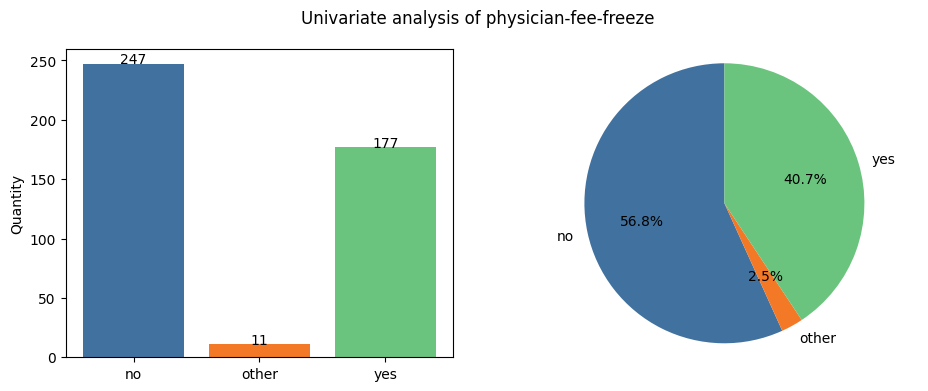

In [89]:
plot_univariate_analysis(df['physician-fee-freeze'])

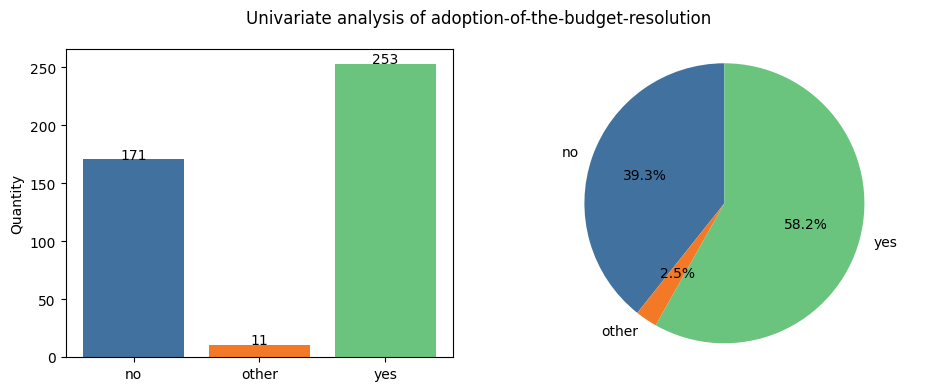

In [90]:
plot_univariate_analysis(df['adoption-of-the-budget-resolution'])

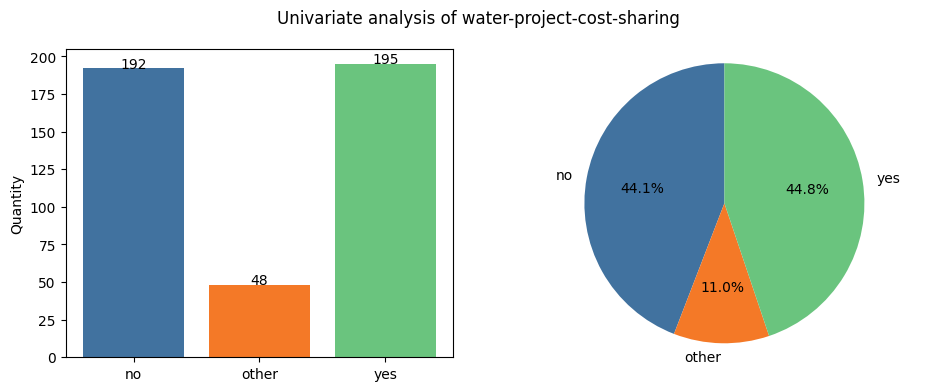

In [91]:
plot_univariate_analysis(df['water-project-cost-sharing'])

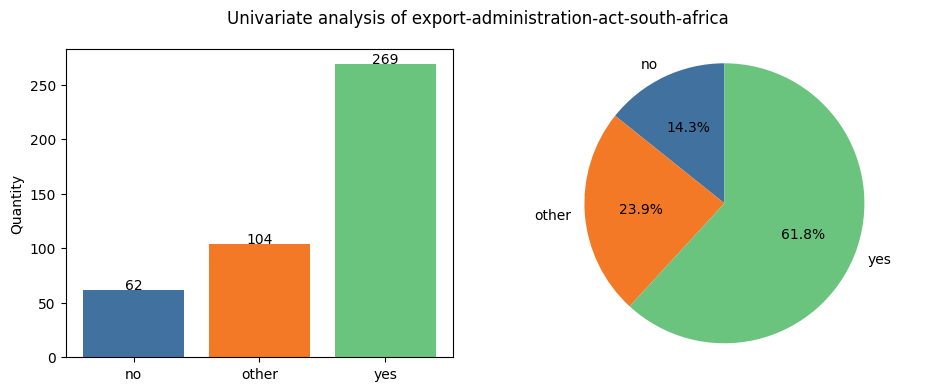

In [92]:
plot_univariate_analysis(df['export-administration-act-south-africa'])

## Observations from the univariate analysis:

Through the graphs, we were able to observe the distribution of votes for each vote. The '?' class, now called 'other,' always represented the minority, except for 'export-administration-act-south-africa,' as seen in the upper graph.

# Bivariate analysis

Now, let's contrast the distribution of the target-classes across the rest of the variables. To do this we will use a function to properly display the data:

In [93]:
def plot_bivariate_analysis(df, column1, column2):
    ax = sns.countplot(x=column1, hue=column2, data=df, dodge=False, alpha=0.80, order=['yes', 'no', 'other'], hue_order=['democrat', 'republican'])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['Republican' if label == 'republican' else 'Democrat' for label in labels]

    ax.set_title(f'Bivariate analysis of {column1}')
    plt.show()

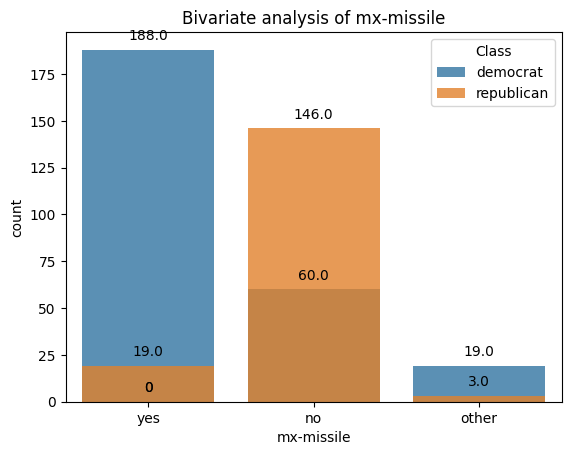

In [94]:
plot_bivariate_analysis(df, 'mx-missile', 'Class')

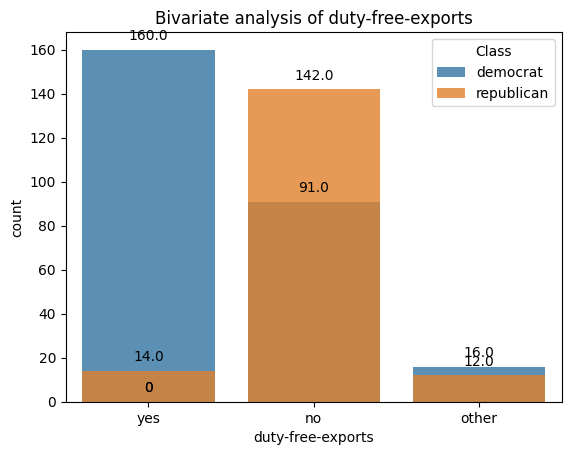

In [95]:
plot_bivariate_analysis(df, 'duty-free-exports', 'Class')

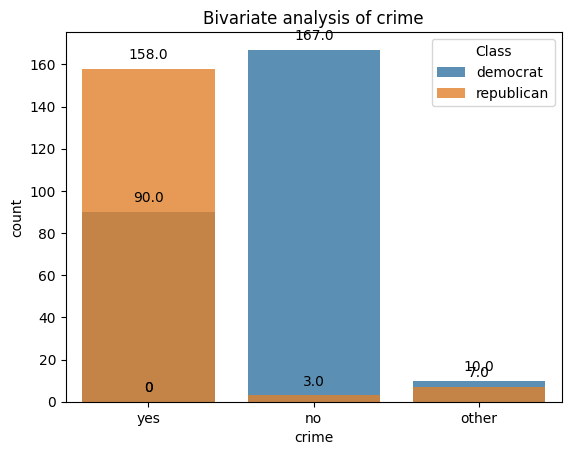

In [96]:

plot_bivariate_analysis(df, 'crime', 'Class')

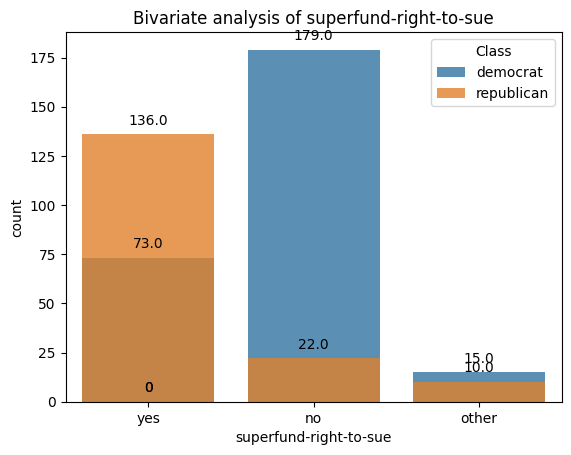

In [97]:
plot_bivariate_analysis(df, 'superfund-right-to-sue', 'Class')

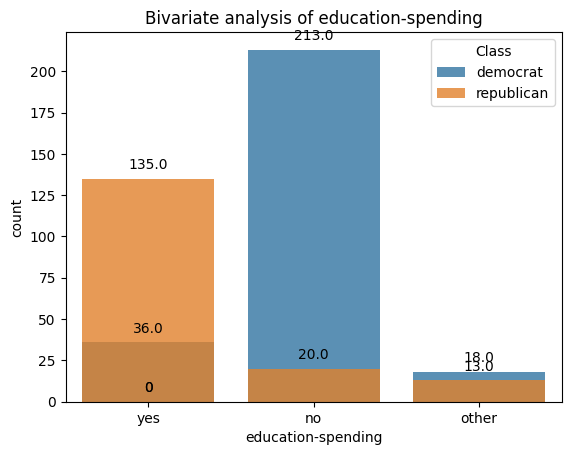

In [98]:
plot_bivariate_analysis(df, 'education-spending', 'Class')

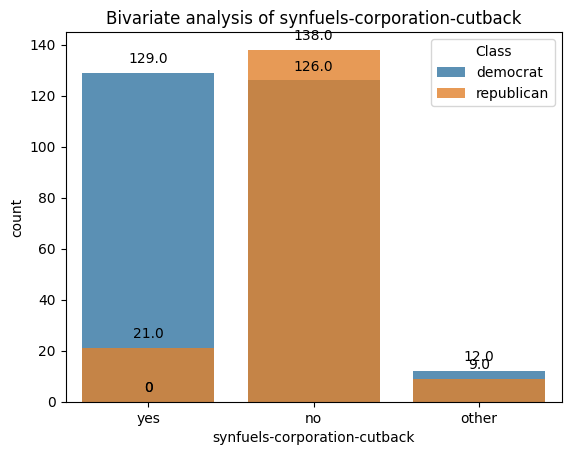

In [99]:
plot_bivariate_analysis(df, 'synfuels-corporation-cutback', 'Class')

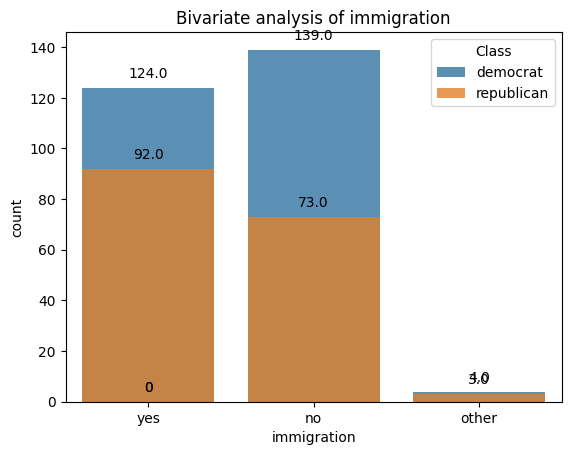

In [100]:
plot_bivariate_analysis(df, 'immigration', 'Class')

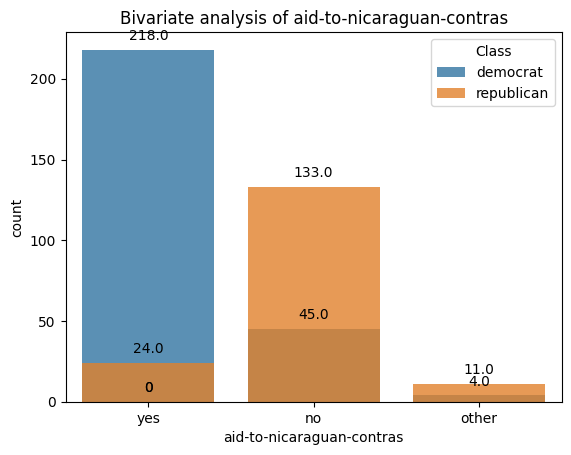

In [101]:
plot_bivariate_analysis(df, 'aid-to-nicaraguan-contras', 'Class')

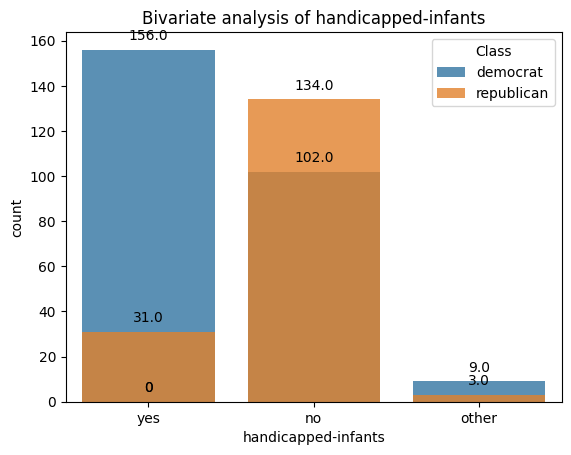

In [102]:
plot_bivariate_analysis(df, 'handicapped-infants', 'Class')

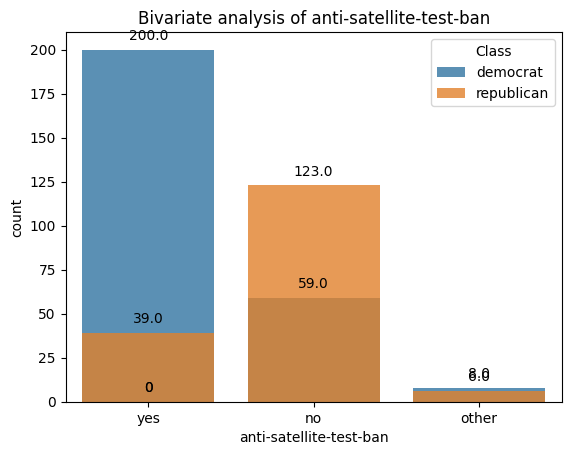

In [103]:
plot_bivariate_analysis(df, 'anti-satellite-test-ban', 'Class')

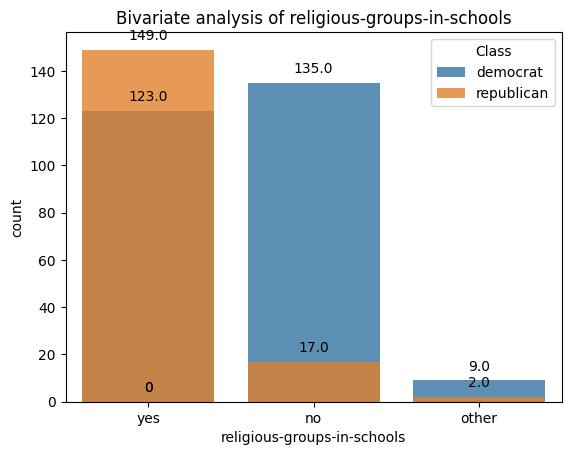

In [104]:
plot_bivariate_analysis(df, 'religious-groups-in-schools', 'Class')

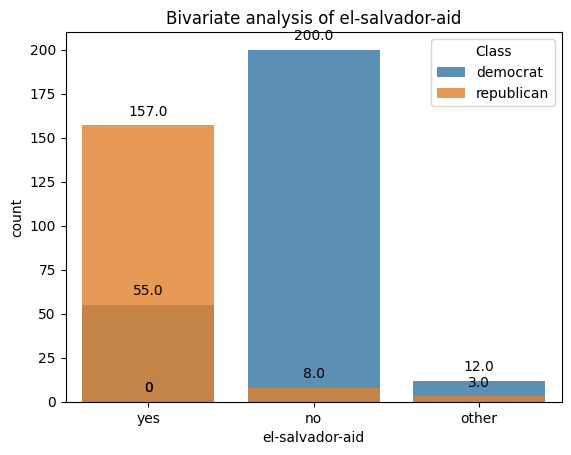

In [105]:
plot_bivariate_analysis(df, 'el-salvador-aid', 'Class')

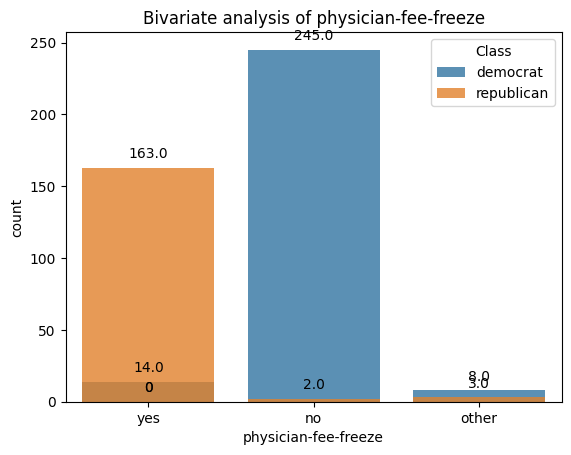

In [106]:
plot_bivariate_analysis(df, 'physician-fee-freeze', 'Class')

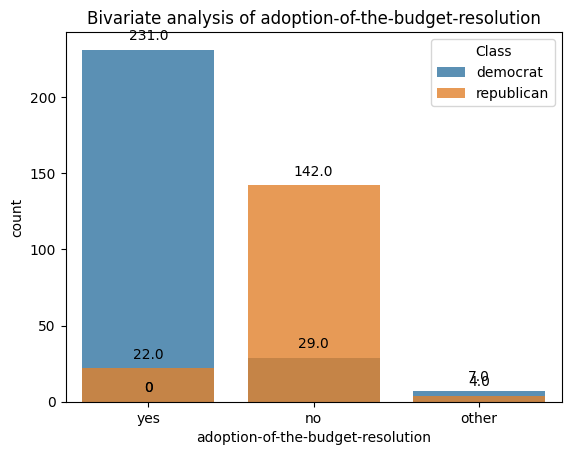

In [107]:
plot_bivariate_analysis(df, 'adoption-of-the-budget-resolution', 'Class')

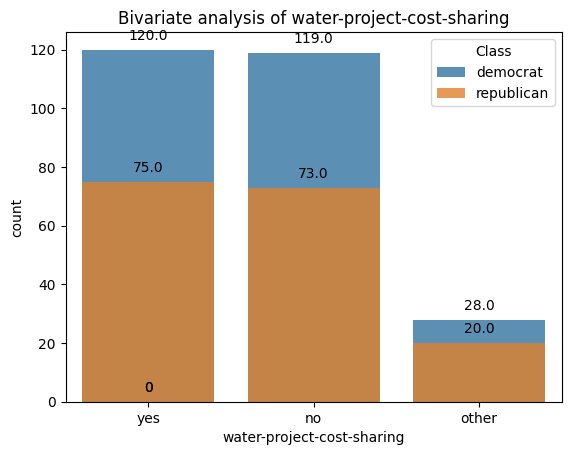

In [108]:
plot_bivariate_analysis(df, 'water-project-cost-sharing', 'Class')

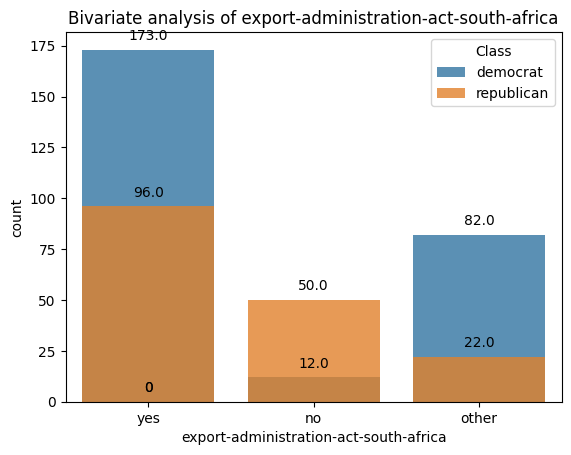

In [109]:

plot_bivariate_analysis(df, 'export-administration-act-south-africa', 'Class')

## Observations from the bivariate analysis

We were able to see how the target classes [Democrat, Republican] were distributed in relation to each variable by looking at the graphs. Depending on the business rule or case study, we could be able to collect useful data regarding party patterns, divisions, dimensions, etc.

A contentious vote on "immigration," for instance, reveals that all parties cast votes almost equally in favour and against, creating an incredibly uncommon situation for the political scene. Or the instance of the "physician-fee-freeze," in which the Republican and Democratic votes were nearly exactly in line with one another.

[*] By the way, based on my study, it appears that the plotting library has some sort of setup error where columns are randomly represented. This leads to problems when a larger column follows a smaller one right away, covering the former. It was covered for the time being by adding a light layer of transparency.

# Feature selection

## Chi2 filter method

Given the categorical input variables and the categorical target variable, we perform a chi2 test to assess the dependence with the target variable:

In [110]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Class')  # Me aseguro que la variable objetivo no este en la lista

target_column = 'Class'
chi2_results = []

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target_column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((column, chi2, p))

# I order the results by p-value in descending order
chi2_results.sort(key=lambda x: x[2], reverse=False)

for column, chi2, p in chi2_results:
    print(f"Column: {column}")
    print(f"chi2 value: {chi2}")
    print(f"p_value: {p}")
    if p > 0.05:
        print('\n>>> This feature exceeds the indicated p-value\n')
    print("------------------------")

Column: physician-fee-freeze
chi2 value: 363.03966281323983
p_value: 1.4687195105342753e-79
------------------------
Column: adoption-of-the-budget-resolution
chi2 value: 237.93583713543606
p_value: 2.1522337751446286e-52
------------------------
Column: el-salvador-aid
chi2 value: 220.60136012890015
p_value: 1.2503261024671214e-48
------------------------
Column: education-spending
chi2 value: 206.1350221332732
p_value: 1.731205727555594e-45
------------------------
Column: aid-to-nicaraguan-contras
chi2 value: 189.58136965643266
p_value: 6.806575141201659e-42
------------------------
Column: mx-missile
chi2 value: 171.88706024664313
p_value: 4.73368235622918e-38
------------------------
Column: crime
chi2 value: 163.31424314923504
p_value: 3.4416182186286375e-36
------------------------
Column: superfund-right-to-sue
chi2 value: 126.65119665750751
p_value: 3.1480533418146357e-28
------------------------
Column: duty-free-exports
chi2 value: 117.81132569245088
p_value: 2.6157466213444

We observe that only two features have a p-value greater than 0.05: water-project-cost-sharing and immigration. We will not use these input variables in the model, as they do not have a statistically significant association with the target variable.

# Value codification

SVM takes as input variables those whose values are numeric, as the model assumes a numeric distance between values. We will use One-Hot Encoding, instead of Label Encoder, to avoid introducing a numeric ordering relationship that does not actually exist: ['yes', 'no', 'other'].

One-Hot Encoding makes each category become a new binary feature, meaning the original variable is decomposed into multiple binary variables (0 or 1). In this extended feature space, it's possible that classes are linearly separable with respect to these new features.

For classification use, SVM internally handles the classes of the target variable. In the case of binary classification, it takes values like [-1, 1], so there's no need to encode them.

In [111]:
# We will exclude features that we do not use, plus the target feature
columns_to_dummies = df.columns[(df.columns != 'Class') & (df.columns != 'water-project-cost-sharing') & (df.columns != 'immigration')]
df = pd.get_dummies(df, columns=columns_to_dummies)

Let's take a look at the resulting dataset:

In [112]:
df.head()

,Class,water-project-cost-sharing,immigration,handicapped-infants_no,handicapped-infants_other,handicapped-infants_yes,adoption-of-the-budget-resolution_no,adoption-of-the-budget-resolution_other,adoption-of-the-budget-resolution_yes,physician-fee-freeze_no,...,superfund-right-to-sue_yes,crime_no,crime_other,crime_yes,duty-free-exports_no,duty-free-exports_other,duty-free-exports_yes,export-administration-act-south-africa_no,export-administration-act-south-africa_other,export-administration-act-south-africa_yes
0,republican,yes,yes,True,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,False,True
1,republican,yes,no,True,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,True,False
2,democrat,yes,no,False,True,False,False,False,True,False,...,True,False,False,True,True,False,False,True,False,False
3,democrat,yes,no,True,False,False,False,False,True,True,...,True,True,False,False,True,False,False,False,False,True
4,democrat,yes,no,False,False,True,False,False,True,True,...,True,False,False,True,False,False,True,False,False,True


As we can see, the target class remains unchanged, and the columns are now transformed for each possible response of the original column. In this case, we wouldn't have problems widening the dataset, as we have a small number of records in general.

# Model implementation

## Partition


SVM works better with a greater number of variables, so we will assign all input variables to it, but omit the target variable along with ['water-project-cost-sharing', 'immigration'] as they were discriminated previously by the chi2 test.

In [113]:
X = df.drop(['Class', 'water-project-cost-sharing', 'immigration'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

By convention, we use an 80/20 split for this partition.

Given the low number of records, tests were conducted with 70/30 and 65/35 splits to evaluate the model's reliability with more training and less testing, and with less training and more testing. In both cases, the results were similar to the proposed split.

## Instance and training

After consulting [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and evaluating kernels and hyperparameters with tools like [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), these were the best results obtained:

* Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

It's worth noting that these adjustments correspond to the default ones that come with the RBF kernel.

In [114]:
svc = SVC(kernel='rbf', C=1, gamma='scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.96      0.98      0.97        56
  republican       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87



### Observations from the predictions

The classification results using an SVM with the 'rbf' (Radial Basis Function) kernel on the dataset show very high performance. Now, let's analyze the metrics:

* Precision is very high for both classes, with 0.96 (96% accuracy) for the Democrat class and 0.97 (97% accuracy) for the Republican class. This indicates that the model can classify voters with very high precision.

* Recall is also high, with 0.98 for Democrats and 0.94 for Republicans. This means the model is very effective in detecting true voters for each party. The model correctly identified 98% of true Democrats and 94% of true Republicans.

* The f1-score, which is the harmonic mean of precision and recall, is excellent for both classes, with 0.97 for Democrats and 0.95 for Republicans. These values indicate that the balance between precision and recall is very good.

* The overall accuracy of the model is 0.97, meaning that 97% of all predictions made by the model are correct.

This supports that the model has strong performance in both classes, and this performance is consistent even when the Democrat class is slightly better explained.

## Confusion matrix

The confusion matrix in machine learning is used to evaluate the performance of a model by showing the count of true positives, true negatives, false positives, and false negatives in a classification problem.

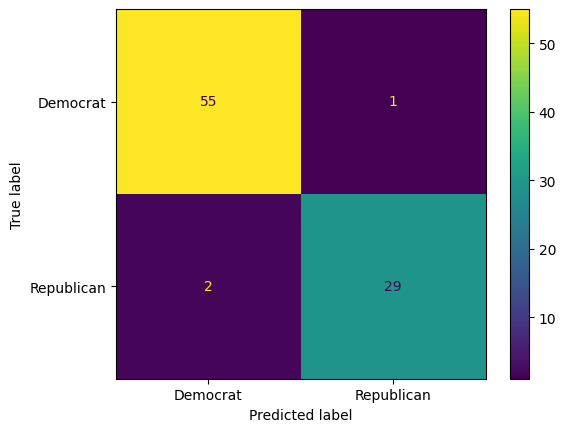

In [115]:
matrix = confusion_matrix(y_test, y_pred)
display_labels = ['Democrat', 'Republican']

mc_visual = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=display_labels)
mc_visual.plot()

From the 56 actual voters in the Democrat class, 55 were correctly classified, and 1 was classified as Republican. This results in a high recall rate for the Democrat class.

For the 31 voters in the Republican class, 29 were correctly classified, and only 2 were classified as Democrat. This also leads to a high recall rate for the Republican class.

## Cross validation

In [116]:
scores = cross_val_score(svc, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.95402299 0.95402299 0.95402299 0.98850575 0.91954023]
Accuracy: 0.95 (+/- 0.04)


# Results

The trained SVM model performs well and is consistent across different subsets of the dataset. The average precision is 95% with a variability of ±4%, indicating that the model is stable and generalizes well to new data.

SVC proved to be a model that, for the case study, offered robustness, simplicity, speed, and above all, good results from the start. It would be interesting to see its performance with larger datasets or those whose data is not distributed in typical ways.

